In [3]:
import pandas as pd
data=pd.read_csv("D:/obesity dataset -7.csv")
data.head()

,Gender,Age,Height,Weight,Family history with overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Consumption of water,Calories consumption monitoring,Physical activity frequency,SMOKE,Consumption of alcohol,Transportation used,Obesity level deducted
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,2.0,no,0.0,no,no,Public_Transportation,no
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,3.0,yes,3.0,yes,Sometimes,Public_Transportation,no
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,2.0,no,2.0,no,Frequently,Public_Transportation,no
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,2.0,no,2.0,no,Frequently,Walking,yes
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,2.0,no,0.0,no,Sometimes,Public_Transportation,yes


In [45]:
data['Gender'].replace(['Female','Male'],[2,1],inplace=True)
data['Family history with overweight'].replace(['yes', 'no'],[1,0],inplace=True)
data['Frequent consumption of high caloric food'].replace(['yes', 'no'],[1,0],inplace=True)
data['Consumption of food between meals'].replace(['no','Sometimes', 'Frequently', 'Always'],[1,2,3,4],inplace=True)
data['Calories consumption monitoring'].replace(['yes', 'no'],[1,0],inplace=True)
data['SMOKE'].replace(['yes', 'no'],[1,0],inplace=True)
data['Consumption of alcohol'].replace(['no','Sometimes', 'Frequently', 'Always'],[1,2,3,4],inplace=True)
data['Transportation used'].replace(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike','Bike'],[1,2,3,4,5],inplace=True)
data

,Gender,Age,Height,Weight,Family history with overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Consumption of water,Calories consumption monitoring,Physical activity frequency,SMOKE,Consumption of alcohol,Transportation used,Obesity level deducted
0,2,21,1.620000,64.000000,1,0,2.0,3.0,2,2.0,0,0.0,0,0,1,no
1,2,21,1.520000,56.000000,1,0,3.0,3.0,2,3.0,1,3.0,1,2,1,no
2,1,23,1.800000,77.000000,1,0,2.0,3.0,2,2.0,0,2.0,0,3,1,no
3,1,27,1.800000,87.000000,0,0,3.0,3.0,2,2.0,0,2.0,0,3,2,yes
4,1,22,1.780000,89.800000,0,0,2.0,1.0,2,2.0,0,0.0,0,2,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2,21,1.710730,131.408528,1,1,3.0,3.0,2,2.0,0,2.0,0,2,1,yes
2107,2,22,1.748584,133.742943,1,1,3.0,3.0,2,2.0,0,1.0,0,2,1,yes
2108,2,23,1.752206,133.689352,1,1,3.0,3.0,2,2.0,0,1.0,0,2,1,yes
2109,2,24,1.739450,133.346641,1,1,3.0,3.0,2,3.0,0,1.0,0,2,1,yes


In [48]:
X=data.drop('Obesity level deducted',axis=1)
y=data['Obesity level deducted']

In [49]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

encoder=LabelEncoder()
y=encoder.fit_transform(y)
scaler=StandardScaler()


In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train=scaler.fit_transform(X_train,)
X_test=scaler.transform(X_test)

In [58]:
from sklearn.metrics import accuracy_score
values=[i for i in range(1,21)]
train_score,test_score=[],[]
for i in values:
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    train_acc=accuracy_score(y_train,train_pred)
    test_pred=model.predict(X_test)
    test_acc=accuracy_score(y_test,test_pred)
    train_score.append(train_acc)
    test_score.append(test_acc)
    print('%d: Train : %.2f Test : %.2f '%(i,train_acc,test_acc))

1: Train : 0.93 Test : 0.91 
2: Train : 0.94 Test : 0.91 
3: Train : 0.97 Test : 0.96 
4: Train : 0.98 Test : 0.95 
5: Train : 0.99 Test : 0.97 
6: Train : 1.00 Test : 0.99 
7: Train : 1.00 Test : 0.98 
8: Train : 1.00 Test : 0.98 
9: Train : 1.00 Test : 0.99 
10: Train : 1.00 Test : 0.98 
11: Train : 1.00 Test : 0.98 
12: Train : 1.00 Test : 0.98 
13: Train : 1.00 Test : 0.98 
14: Train : 1.00 Test : 0.99 
15: Train : 1.00 Test : 0.98 
16: Train : 1.00 Test : 0.98 
17: Train : 1.00 Test : 0.98 
18: Train : 1.00 Test : 0.98 
19: Train : 1.00 Test : 0.98 
20: Train : 1.00 Test : 0.98 


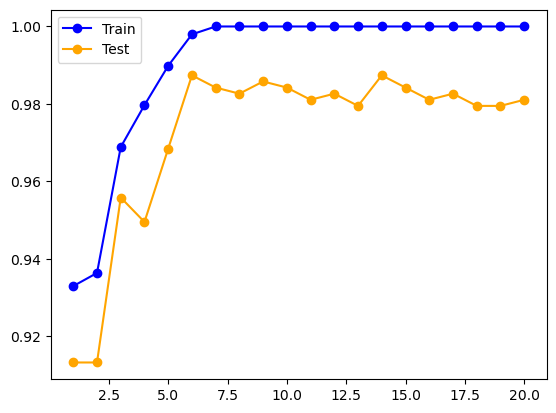

In [63]:
import matplotlib.pyplot as plt
plt.plot(values,train_score,'o-',color='blue')
plt.plot(values,test_score,'o-',color='orange')
plt.legend(['Train','Test'])
plt.show()

In [66]:
from sklearn.model_selection import GridSearchCV
paramgrid={'criterion':['entropy','gini'],'max_depth':[2,4,6,10,20]}
clf=GridSearchCV(DecisionTreeClassifier(),paramgrid,cv=10,n_jobs=-1,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 10, 20]},
             scoring='accuracy')

In [68]:
clf.best_params_
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [72]:
best_clf=clf.best_estimator_
train_pred=best_clf.predict(X_train)
train_acc=accuracy_score(y_train,train_pred)
test_pred=best_clf.predict(X_test)
test_acc=accuracy_score(y_test,test_pred)
print("Train accuracy: %.2f"%(train_acc))
print("Test accuracy: %.2f"%(test_acc))

Train accuracy: 1.00
Test accuracy: 0.99
